In [12]:
import networkx as nx
from collections import deque
from queue import PriorityQueue
import random

weight = 'weight'

In [17]:
def prims(g: nx.Graph):
    n = len(g)
    q = PriorityQueue()
    q.put((0, 0, 0))
    visited = [False] * n
    mst = nx.Graph()
    while q.qsize():
        d, u, parent = q.get()
        if visited[u]:
            continue
        if u != 0:
            mst.add_edge(u, parent)
            mst.edges[(u, parent)][weight] = d
        visited[u] = True
        for v in g.neighbors(u):
            q.put((g.edges[(u, v)][weight], v, u))
    return mst

def check_prims(g, mst):
    total_weight = lambda t: sum(nx.get_edge_attributes(t,weight).values())
    t = nx.minimum_spanning_tree(g)
    return total_weight(t) == total_weight(mst)


In [18]:
def draw(g, pos):
    labels = nx.get_edge_attributes(g, weight)
    nx.draw(g, pos, with_labels=True)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

In [19]:
g = nx.gnm_random_graph(10, 20)
for u, v in g.edges:
    g.edges[(u, v)][weight] = random.randint(1, 5)
pos = nx.spring_layout(g)

In [21]:
mst = prims(g)

check_prims(g, mst)

True

In [151]:
class UnionFind:

    def __init__(self, n):
        self.count = 0
        self.parent = {i: i for i in range(n)}
        self.size = {i: 1 for i in range(n)}

    def find(self, p):
        while self.parent[p] != p:
            self.parent[p] = self.parent[self.parent[p]]
            p = self.parent[p]
        return p

    def connected(self, p, q):
        return self.find(p) == self.find(q)

    def union(self, p, q):
        rp = self.find(p)
        rq = self.find(q)
        rp, rq = (rp, rq) if self.size[rp] < self.size[rq] else (rq, rp)
        self.parent[rp] = rq
        self.size[rq] += self.size[p]

In [152]:
def kruskal(g):
    n = len(g)
    edges = deque(sorted(g.edges, key=lambda e: g.edges[e][weight]))
    i = 0
    uf = UnionFind(n)
    mst = nx.Graph()
    while i < n - 1:
        u, v = edges.popleft()
        if uf.connected(u, v):
            continue
        uf.union(u, v)
        mst.add_edge(u, v)
        mst.edges[(u, v)][weight] = g.edges[(u, v)][weight]
        i += 1
    return mst

In [153]:
mst = kruskal(g)

In [154]:
check_prims(g, mst)

True

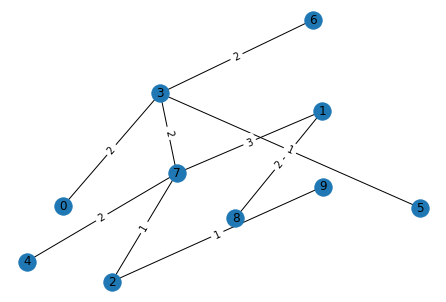

In [155]:
draw(mst, nx.spring_layout(g))

### 1135. Connecting Cities With Minimum Cost
q.q